# Zomato (Bangalore) Dataset

## Data Preparation

In [21]:
# Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Reading the dataset
zomato=pd.read_csv("zomato_12.csv",index_col=False)
zomato.drop(zomato.columns[zomato.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
zomato.head() #This function returns the first n rows for the object based on position.

,name,online_order,book_table,rate,phone,rest_type,dish_liked,listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,080 42297555\r\n+91 9743772233,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",Banashankari
1,Spice Elephant,Yes,No,4.1/5,080 41714161,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",Banashankari
2,San Churro Cafe,Yes,No,3.8/5,+91 9663487993,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...",Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,+91 9620009302,Quick Bites,Masala Dosa,Banashankari
4,Grand Village,No,No,3.8/5,+91 8026612447\r\n+91 9901210005,Casual Dining,"Panipuri, Gol Gappe",Banashankari


In [23]:
# Finding the total number of Duplicate rows
print('Total Number of duplicated rows :',zomato.duplicated().sum())

# Dropping the duplicated rows
zomato.drop_duplicates(inplace=True)

# Checking if all the duplicated rows are deleted
print('After Deleting, total number of duplicated rows :',zomato.duplicated().sum())

Total Number of duplicated rows : 2
After Deleting, total number of duplicated rows : 0


In [24]:
# Finding the total NaN values of each column of the dataset
print(zomato.isnull().sum())

# Dropping the NaN values
zomato.dropna(inplace=True)

# Checking if all the NaN values are deleted
print(zomato.isnull().sum())

name                1
online_order        0
book_table          0
rate                0
phone              13
rest_type           0
dish_liked          0
listed_in(city)     0
dtype: int64
name               0
online_order       0
book_table         0
rate               0
phone              0
rest_type          0
dish_liked         0
listed_in(city)    0
dtype: int64


In [25]:
# Changing the Columns Names
print(zomato.columns)
zomato = zomato.rename(columns={'listed_in(city)':'city'})
print(zomato.columns)

Index(['name', 'online_order', 'book_table', 'rate', 'phone', 'rest_type',
       'dish_liked', 'listed_in(city)'],
      dtype='object')
Index(['name', 'online_order', 'book_table', 'rate', 'phone', 'rest_type',
       'dish_liked', 'city'],
      dtype='object')


In [26]:
# Removing 'NEW' and '-' from Rates
print(zomato['rate'].unique())
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
# Replacing '/5' from rates
zomato['rate'] = [rate.replace('/5', '') for rate in zomato.rate]
zomato['rate'] = [float(rate) for rate in zomato.rate]
zomato['rate'].head()

['4.1/5' '3.8/5' '3.7/5' '4.6/5' '4.2/5' '4.0/5' '3.9/5' '3.0/5' '4.7/5'
 '4.3/5' '3.4/5' 'NEW' '3.6/5' '2.7/5' '3.2/5' '2.9/5' '3.3/5' '4.4/5'
 '4.8/5' '3.8 /5' '4.1 /5' '4.2 /5' '4.3 /5' '3.9 /5' '3.5/5' '2.8/5'
 '2.4/5' '2.6/5' '3.1/5' '2.3/5' '4.5/5' '3.7 /5' '3.3 /5' '4.0 /5'
 '4.4 /5' '2.8 /5' '2.9 /5' '2.6 /5' '3.5 /5' '3.6 /5' '4.7 /5' '4.5 /5'
 '3.1 /5' '2.0 /5' '2.5 /5']


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [29]:
# Removing the whitespace characters in Phone column
phone = zomato.phone
phone = [str(i).replace("\r","") for i in phone]
phone = [i.replace("\n",", ") for i in phone]
zomato.phone = phone
zomato

,name,online_order,book_table,rate,phone,rest_type,dish_liked,city
0,Jalsa,Yes,Yes,4.1,"080 42297555, +91 9743772233",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",Banashankari
1,Spice Elephant,Yes,No,4.1,080 41714161,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",Banashankari
2,San Churro Cafe,Yes,No,3.8,+91 9663487993,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...",Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,+91 9620009302,Quick Bites,Masala Dosa,Banashankari
4,Grand Village,No,No,3.8,"+91 8026612447, +91 9901210005",Casual Dining,"Panipuri, Gol Gappe",Banashankari
...,...,...,...,...,...,...,...,...
464,Smaaash,Yes,Yes,3.8,"+91 7625087121, +91 8050587483","Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...",Whitefield
465,Red Glow,No,No,3.9,080 49435000,"Fine Dining, Bar",Rooftop Ambience,Whitefield
466,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,2.8,"080 39451000, +91 8884038484","Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...",Whitefield
467,Topsy Turvey,No,No,2.5,080 65951222,"Casual Dining, Bar","Biryani, Andhra Meal",Whitefield


In [30]:
# Adjust the columns
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [31]:
zomato

,name,online_order,book_table,rate,phone,rest_type,dish_liked,city
0,Jalsa,True,True,4.1,"080 42297555, +91 9743772233",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",Banashankari
1,Spice Elephant,True,False,4.1,080 41714161,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",Banashankari
2,San Churro Cafe,True,False,3.8,+91 9663487993,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...",Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,+91 9620009302,Quick Bites,Masala Dosa,Banashankari
4,Grand Village,False,False,3.8,"+91 8026612447, +91 9901210005",Casual Dining,"Panipuri, Gol Gappe",Banashankari
...,...,...,...,...,...,...,...,...
464,Smaaash,True,True,3.8,"+91 7625087121, +91 8050587483","Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...",Whitefield
465,Red Glow,False,False,3.9,080 49435000,"Fine Dining, Bar",Rooftop Ambience,Whitefield
466,M Bar - Bengaluru Marriott Hotel Whitefield,False,False,2.8,"080 39451000, +91 8884038484","Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...",Whitefield
467,Topsy Turvey,False,False,2.5,080 65951222,"Casual Dining, Bar","Biryani, Andhra Meal",Whitefield


## Data Visualization

Text(0.5, 1.0, 'Restaurants delivering online or Not')

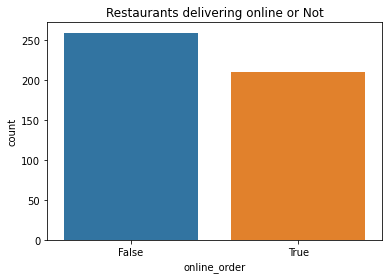

In [32]:
# Restaurants delivering Online or not
sns.countplot(zomato['online_order'])
plt.title('Restaurants delivering online or Not')

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

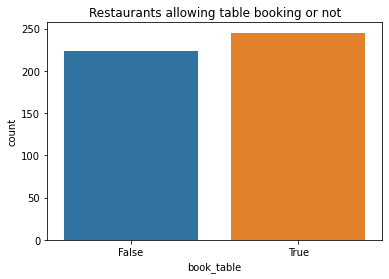

In [33]:
# Restaurants allowing table booking or not
sns.countplot(zomato['book_table'])
plt.title('Restaurants allowing table booking or not')

Text(0.5, 1.0, 'NO. of restaurants in a Location')

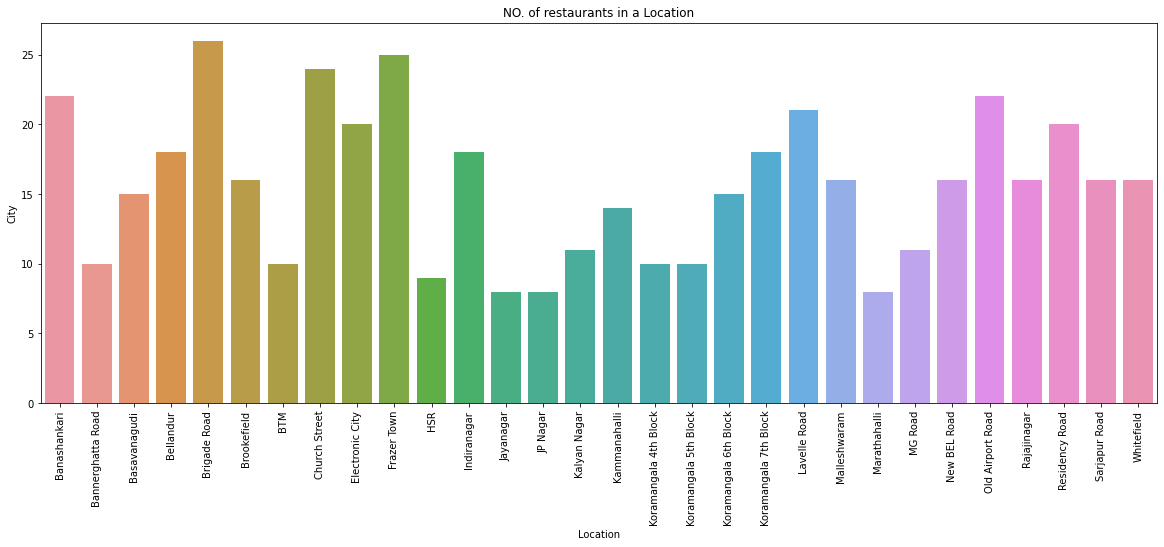

In [34]:
# NO. of restaurants in a Location',
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="city",data=zomato)
loc.set_xticklabels(loc.get_xticklabels(), rotation=90)
plt.ylabel("City")
plt.xlabel("Location")
loc
plt.title('NO. of restaurants in a Location')

Text(0.5, 1.0, 'Restaurant types')

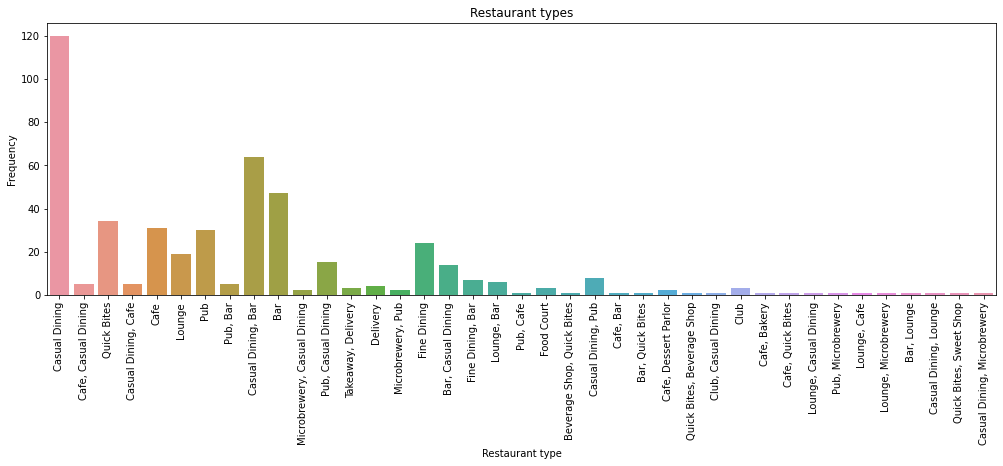

In [35]:
# Restaurant type
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato)
rest.set_xticklabels(rest.get_xticklabels(), rotation=90)
plt.ylabel("Frequency")
plt.xlabel("Restaurant type")
rest 
plt.title('Restaurant types')

## Data Search

In [36]:
# Searching the best suitable restaurant as per ratings, location, online order
def best_rest(r_location):
    list_of_cities = zomato.city.to_list()
    if r_location in list_of_cities:
        # Restaurants available in the location specifies
        zomato_order = zomato.loc[zomato['city'] == r_location]
    
        # Restaurants in the city which allows online orders
        zomato_order = zomato_order.loc[zomato_order['online_order'] == True]
        
        if zomato_order.empty:
            print("Sorry for inconvenience!! No restaurants are available for online-order")
        else:
            # Best rated restaurants in the city which allows online orders
            zomato_order = zomato_order.loc[zomato_order['rate'] == zomato_order.rate.max()]
            
            count = 1
            print("Details of best rated restaurant/s available for online-ordering are:")
            for restaurant_name in zomato_order.name.unique():
                data = zomato.loc[zomato.name == restaurant_name]
                print(count)
                print("Name :",restaurant_name)
                print("Type :",data.rest_type.unique())
                print("Contact No :",data.phone.unique())
                print("Dish :",data.dish_liked.unique())
                count += 1
                
    
    else:
        print("Sorry for inconvenience!! No restaurants are available in this city")
        
    


In [37]:
# List of cities in Bangalore
print("List of the citites in Bangalore : ")
count = 1
for city in zomato.city.unique():
    print(count,city)
    count += 1
    

List of the citites in Bangalore : 
1 Banashankari
2 Bannerghatta Road
3 Basavanagudi
4 Bellandur
5 Brigade Road
6 Brookefield
7 BTM
8 Church Street
9 Electronic City
10 Frazer Town
11 HSR
12 Indiranagar
13 Jayanagar
14 JP Nagar
15 Kalyan Nagar
16 Kammanahalli
17 Koramangala 4th Block
18 Koramangala 5th Block
19 Koramangala 6th Block
20 Koramangala 7th Block
21 Lavelle Road
22 Malleshwaram
23 Marathahalli
24 MG Road
25 New BEL Road
26 Old Airport Road
27 Rajajinagar
28 Residency Road
29 Sarjapur Road
30 Whitefield


In [38]:
city = input("Enter your city in bangalore : ")
best_rest(city)

Enter your city in bangalore : JP Nagar
Details of best rated restaurant/s available for online-ordering are:
1
Name : 24Th Main
Type : ['Casual Dining']
Contact No : ['080 41477977, 080 41488988']
Dish : ['Hummus Falafel, Gulab Jamun, Shawarma, Bbq Chicken, Mojito, Chicken Biryani, Manchow Soup']
